# Explore Bike Share Data

In [62]:
library(ggplot2)
library(lubridate)
library(anytime)
library(dplyr)

In [106]:
ny <- read.csv('new-york-city.csv')
wash <- read.csv('washington.csv')
chi <- read.csv('chicago.csv')

ny$Start.Time <- anytime(ny$Start.Time)
wash$Start.Time <- anytime(wash$Start.Time)
chi$Start.Time <- anytime(chi$Start.Time)

ny$City <- "New York"
wash$City <- "Washington"
chi$City <- "Chicago"

wash$Gender <- NA
wash$Birth.Year <- NA
wash$City <- 'Washington'
ny$City <- 'New York'
chi$City <- 'Chicago'


In [107]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


In [108]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,Chicago
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,Chicago
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,Chicago
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,Chicago
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,Chicago
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,Chicago


In [93]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,Gender,Birth.Year
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,Washington,NA,NA
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,Washington,NA,NA
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,Washington,NA,NA
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,Washington,NA,NA
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,Washington,NA,NA
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,Washington,NA,NA


In [109]:
all_data <- rbind(ny, wash, chi)

In [110]:
all_data$month <- month(all_data$Start.Time)
all_data$day_of_week <- wday(all_data$Start.Time, label = TRUE)
all_data$hour <- hour(all_data$Start.Time)

In [111]:
#What is the most common month?
most_common_month <- all_data %>%
  count(month) %>%
  arrange(desc(n)) %>%
  slice(1)
print(paste("What is the most common month?:", most_common_month$month))

[1] "What is the most common month?: 6"


In [112]:
#What is the most common day of week?
most_common_day_of_week <- all_data %>%
  count(day_of_week) %>%
  arrange(desc(n)) %>%
  slice(1)
print(paste("What is the most common day of week?:", most_common_day_of_week$day_of_week))

[1] "What is the most common day of week?: Wed"


In [113]:
#What is the most common hour of day?
most_common_hour <- all_data %>%
  count(hour) %>%
  arrange(desc(n)) %>%
  slice(1)
print(paste("What is the most common hour of day:", most_common_hour$hour))

[1] "What is the most common hour of day: 8"


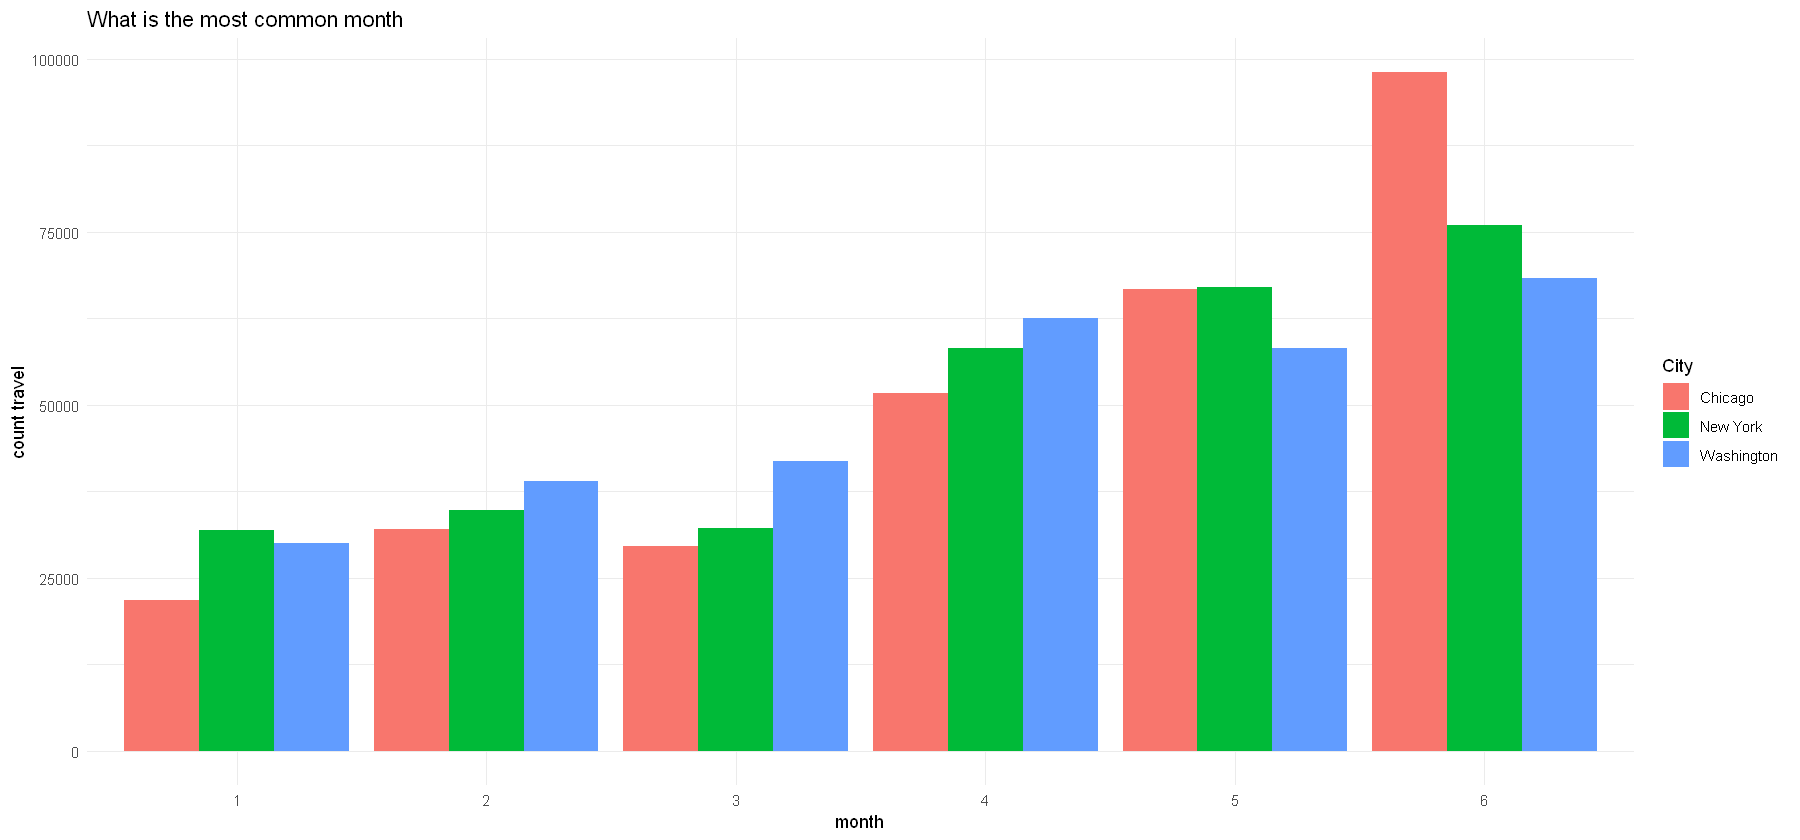

In [116]:
ggplot(all_data, aes(x = factor(month), fill = City)) +
  geom_bar(position = "dodge") +
  labs(title = "What is the most common month", x = "month", y = "count travel") +
  theme_minimal()

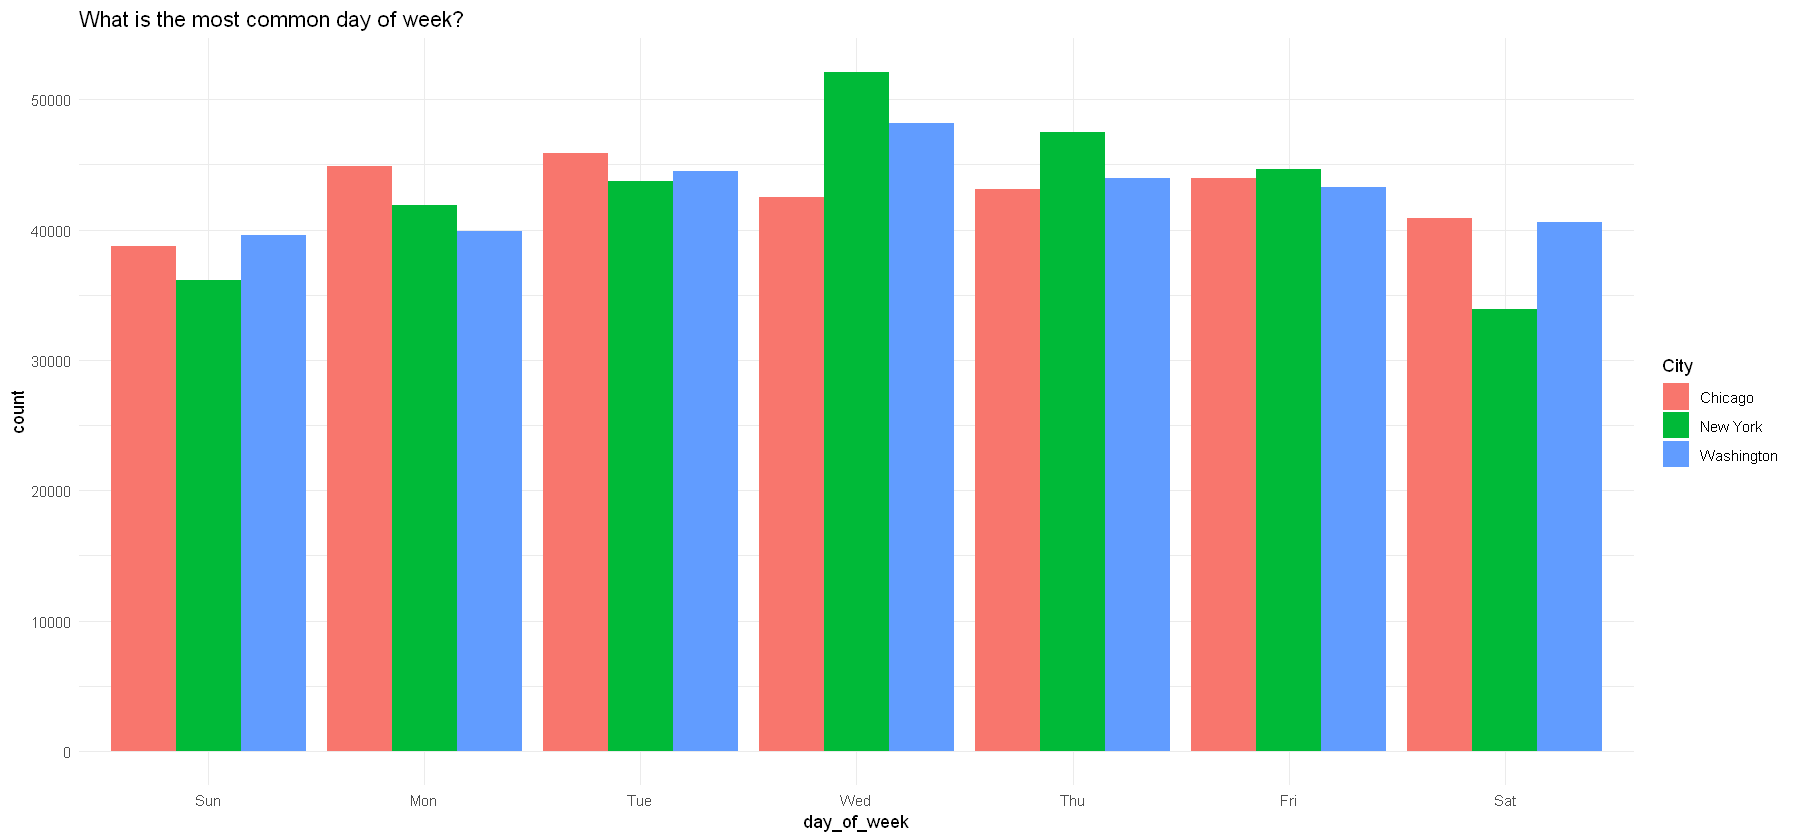

In [70]:
ggplot(all_data, aes(x = day_of_week, fill = City)) +
  geom_bar(position = "dodge") +
  labs(title = "What is the most common day of week?", x = "day_of_week", y = "count") +
  theme_minimal()

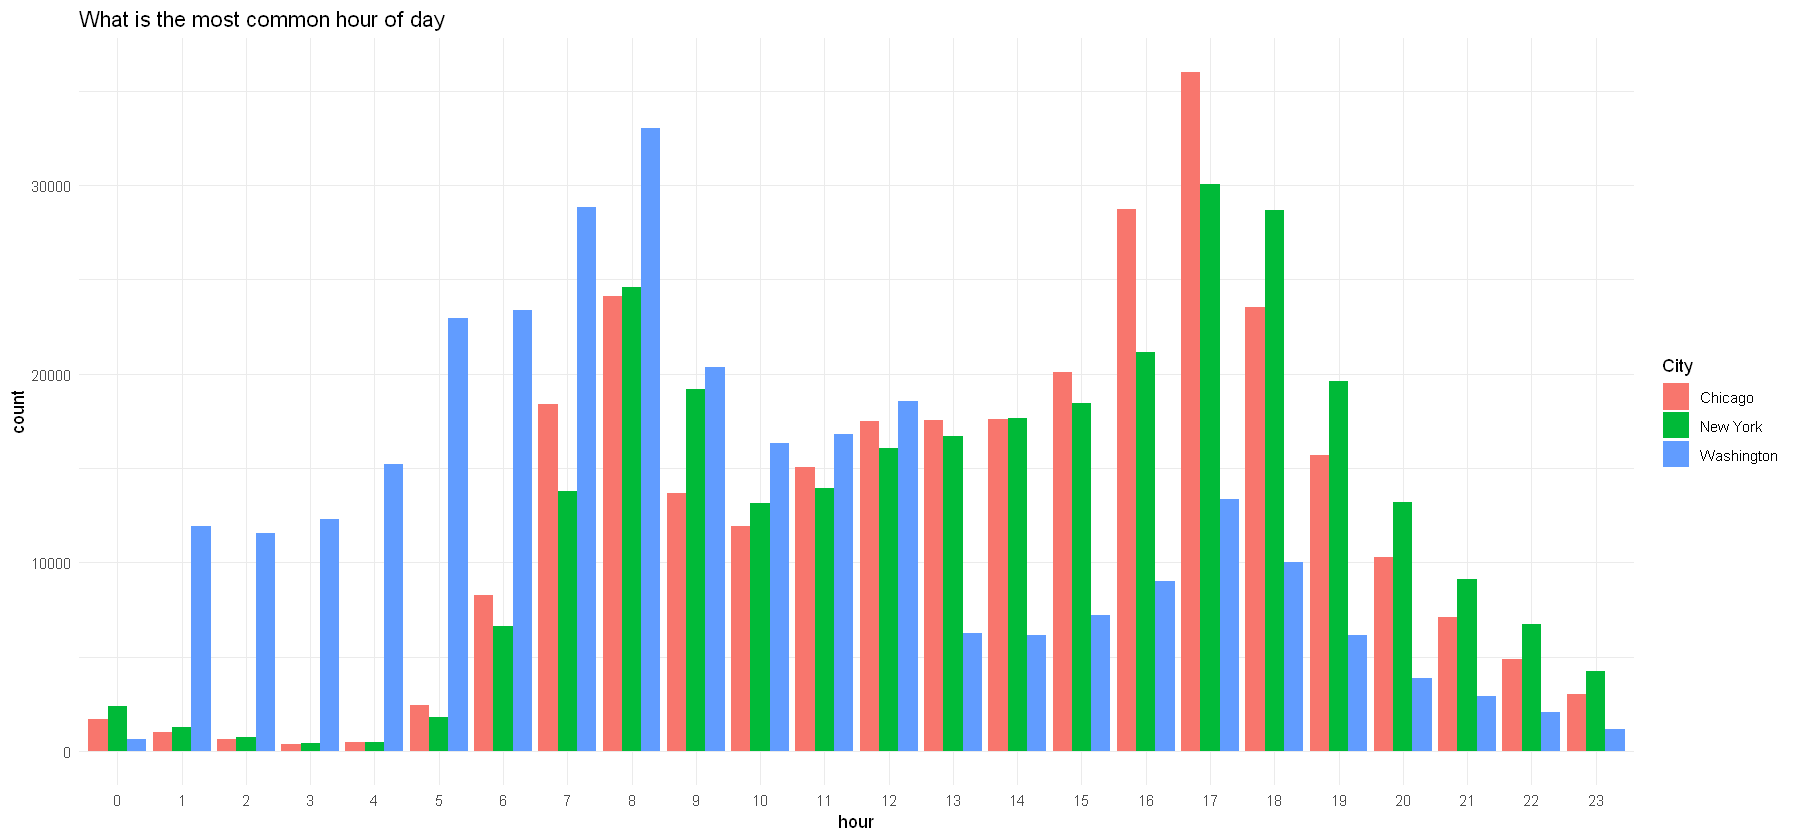

In [115]:
ggplot(all_data, aes(x = factor(hour), fill = City)) +
  geom_bar(position = "dodge") +
  labs(title = "What is the most common hour of day", x = "hour", y = "count") +
  theme_minimal()